# Part 1. Graph representation in Python

In [1]:
#Création de graph vite
import networkx as nx


G = nx.Graph()

Ajout du noeud Mike

In [2]:
G.add_node("Mike")


In [3]:
#Ajout des noeuds Amine, Rémi et Nick
G.add_nodes_from(["Amine", "Remi", "Nick"])

In [4]:
#Ajout de la relation Mike/Amine
G.add_edge("Mike", "Amine")

In [5]:
#Ajout de la relation Amine/Remi
G.add_edge("Amine", "Remi")

In [6]:
#Ajout de la relation Mike/Nick
G.add_edge("Mike", "Nick")

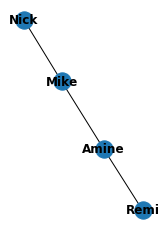

In [7]:
#Affichage du Graphe G
import matplotlib.pyplot as plt


subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Part 2. Calculating centrality metrics using Python

In [8]:
G = nx.Graph()

In [9]:
G.add_nodes_from([1,2, 3,4,5,6,7,8,9])

In [10]:
G.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6),(1,7),(2,8),(2,9)])

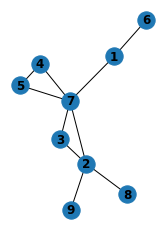

In [11]:
#Affichage du graph
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

## Degree Centrality

In [12]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

La centralité représente au nombre de sommet connecté au noeud n, divisé par le nombre de noeud restant n - 1, par exemple pour le noeud 7, qui à la plus grande valeur, on a 5 arrètes connectées divisé par 9-1 = 8 soit 5/8 = 0.625

On observe ici que le noeud numéro 7 est le plus grand car il à le plus d'arrètes connectées à lui.


## Betweenness Centrality

In [13]:
nx.betweenness_centrality(G)

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

La betweenness centrality représente le taux de passage par un noeud n pour tout nos plus court chemin, plus celui-ci sera proche de 1, plus ce noeud sera un point de passage pour les plus courts chemins.

On observe que le noeud 7 est le plus actif lors du calcul des plus courts chemins entre tous nos noeux

## Closeness Centrality

In [14]:
nx.closeness_centrality(G)

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

# Part 3. Fraud Analytics

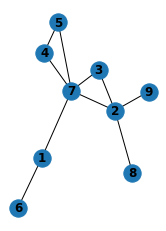

In [15]:
G = nx.Graph()
G.add_nodes_from([1,2, 3,4,5,6,7,8,9])
G.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)])

#Affichage du graph
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [16]:
G.add_nodes_from([2,5,6,7], fraud='F')
G.add_nodes_from([1,4,3,8,9], fraud='NF')

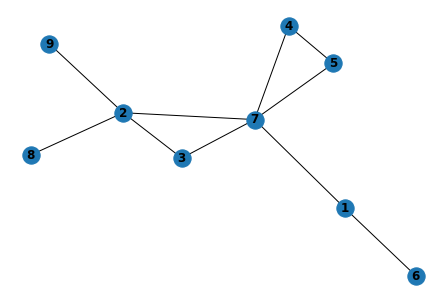

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')

In [18]:
labels = nx.get_node_attributes(G,'fraud') 

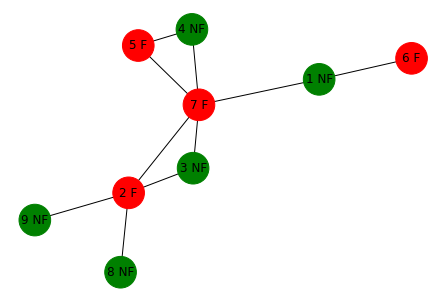

In [19]:

NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

La fonction de détection de fraude :
    - On introduit un noeud
    - On vérifie la probabilité du noeud :
        - On calcul 1/degré du noeud q introduit
        - On multiplie ce résultat à son poid n multiplié par les poids des relation auquel il est lié w(n,nj)
        - Exemple q est relié à 2 noeuds avec un poids de 0.3 pour n1 et 0.4 pour n2 :
            - 1/2
            - (0.3+0.4) = 0.7
            - 0.5 * 0.7 = 0.35
            La probabilité que ce noeuds soit impliqué dans une fraude est de 35%

### Ajout de poids
On ajoute des poids à nos relations, nous partons du principe qu'une relation F-F a un poids de 1, une relation entre un F-NF a un poids de 0.5 et une relation entre NF-NF à un poids de 0.

In [31]:
G_poids = nx.Graph()
G_poids.add_nodes_from([1,2, 3,4,5,6,7,8,9])


G_poids.add_weighted_edges_from([(7,2,1.0), (2,3,0.5), (7,4,0.5), (4,5,0.5), (7,3,0.5), (7,5,1.0),(1,6,0.5),(1,7,0.5),(2,8,0.5),(2,9,0.5)])

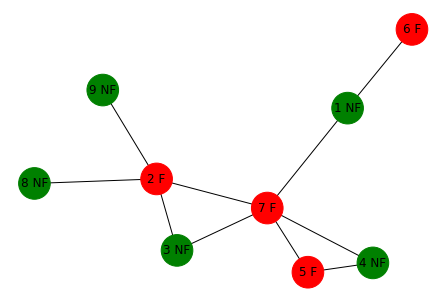

In [32]:
NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G_poids.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G_poids, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

# Simple fraud analytics

In [112]:
G_poids.add_node(10)

In [113]:
G_poids.add_edges_from([(10,6),(10,1),(10,4)])

In [114]:
tab = list(G_poids.edges(10))

In [115]:
NF = [1,4,3,8,9]
F = [2,5,6,7]
weight = []
tab = list(G_poids.edges(10))
#On parcours la première dimension de notre tuple représentant nos relations
for i in range(0,3):
    if tab[i][1] in NF:
        weight.append(0) 
    else :
        weight.append(1)
weight

[1, 0, 0]

In [118]:
#On compte le nombre de poids égaux à 1
weight.count(1)

1

In [120]:
#On applique la formule de probabilité de la fraude
p = 1/G_poids.degree(10) * weight.count(1)

In [123]:
p

#On applique notre seuil de faude, si p est supérieur alors on considère notre noeud comme étant frauduleux
T = 0.5

p>t

False

Ici, on observe que p est inférieur à T, on en conclu que le noeud introduit dans notre réseau est non frauduleux.

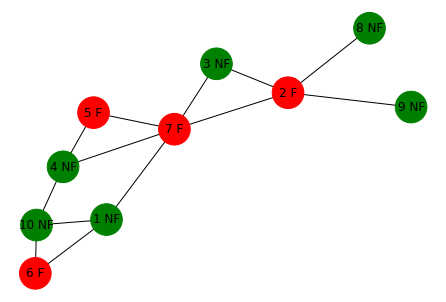

In [126]:
NF = [1,4,3,8,9,10]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G_poids.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G_poids, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

# Scoring negative outcomes

In [128]:
G_new = nx.Graph()
G_new.add_nodes_from([1,2, 3,4,5,6,7,8,9])


G_new.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)])

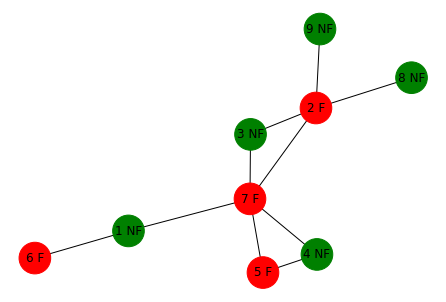

In [130]:

NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G_new.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G_new, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

## Degree Centrality

In [139]:
d_c = nx.degree_centrality(G_new)
d_c 

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

## Betweenness Centrality

In [140]:
b_c = nx.betweenness_centrality(G_new)
b_c

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

## Closeness Centrality

In [141]:
c_c = nx.closeness_centrality(G_new)
c_c

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

## EigenVector Centrality

In [142]:
ev_c = nx.eigenvector_centrality(G_new)
ev_c

{1: 0.23718954703334272,
 2: 0.44568334430993706,
 3: 0.3644005791401007,
 4: 0.3204396611665085,
 5: 0.3204396611665085,
 6: 0.08325088296668741,
 7: 0.5925237685713423,
 8: 0.15643115829567805,
 9: 0.15643115829567805}

In [157]:
#On stock nos moyennes dans une liste
list_mean = []
for i in range(1,10):
    list_mean.append((d_c[i] + b_c[i] + c_c[i] + ev_c[i])  / 4)

In [156]:
list_mean


[0.3092973867583357,
 0.5063384184950667,
 0.2869334781183585,
 0.2602569741151565,
 0.2602569741151565,
 0.13901924248080227,
 0.6647705525324459,
 0.1703577895739195,
 0.1703577895739195]

Noeuds frauduleux : [2,5,6,7]


In [160]:
print("Score négativité pour le noeud 2 : ", list_mean[1])
print("Score négativité pour le noeud 5 : ", list_mean[4])
print("Score négativité pour le noeud 6 : ", list_mean[5])
print("Score négativité pour le noeud 7 : ", list_mean[6])

Score négativité pour le noeud 2 :  0.5063384184950667
Score négativité pour le noeud 5 :  0.2602569741151565
Score négativité pour le noeud 6 :  0.13901924248080227
Score négativité pour le noeud 7 :  0.6647705525324459


In [162]:
mean_list_mean = sum(list_mean) / len(list_mean)

In [163]:
mean_list_mean

0.30750984508479573

In [165]:
print("DOS pour le noeud 2 : ", list_mean[1] * mean_list_mean)
print("DOS pour le noeud 5 : ", list_mean[4] * mean_list_mean)
print("DOS pour le noeud 6 : ", list_mean[5] * mean_list_mean)
print("DOS pour le noeud 7 : ", list_mean[6] * mean_list_mean)

DOS pour le noeud 2 :  0.1557040486318984
DOS pour le noeud 5 :  0.08003158179238948
DOS pour le noeud 6 :  0.042749785719077164
DOS pour le noeud 7 :  0.2044234896261865


In [166]:
dos_1 =  list_mean[1] * mean_list_mean
dos_5 =  list_mean[4] * mean_list_mean
dos_6 =  list_mean[5] * mean_list_mean
dos_7 =  list_mean[6] * mean_list_mean


In [167]:
print("DOS pour le noeud 2 : ", dos_1 / dos_7)
print("DOS pour le noeud 5 : ", dos_5 / dos_7)
print("DOS pour le noeud 6 : ", dos_6 / dos_7)
print("DOS pour le noeud 7 : ", dos_7 / dos_7)

DOS pour le noeud 2 :  0.7616739588812539
DOS pour le noeud 5 :  0.39149895121513223
DOS pour le noeud 6 :  0.20912364717601878
DOS pour le noeud 7 :  1.0
